In [99]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

%matplotlib inline

### Get raw data from the website

In [52]:
response = requests.get('http://floatingmedia.com/columbia/BBC.html')
doc = BeautifulSoup(response.text)

In [53]:
all_info = doc.find(class_="body-content")

In [54]:
all_p = all_info.find_all('p')
all_p

[<p>Communicating with 177 film critics is a time-consuming process. But for every critic who participated – and many more were invited – it wasn’t just a matter of lending their expertise; it was about sharing their passion. The critics who participated hail from 36 countries: 81 from the US, 19 from the UK, five each from Canada, Cuba, France, and Germany, and four each from Australia, Colombia, India, Israel and Italy. Lebanon, the UAE, China, Bangladesh, Chile, Namibia, Kazakhstan and many others are represented too. Of the 177 critics, 55 are women and 122 are men. We present their votes here in alphabetical order.</p>,
 <p><strong>Simon Abrams – Freelance film critic (US)</strong></p>,
 <p>1. Mulholland Drive (David Lynch, 2001)<br/>2. In the Mood for Love (Wong Kar-wai, 2000)<br/>3. The Tree of Life (Terrence Malick, 2011)<br/>4. Yi Yi: A One and a Two (Edward Yang, 2000)<br/>5. Goodbye to Language (Jean-Luc Godard, 2014)<br/>6. The White Meadows (Mohammad Rasoulof, 2009)<br/>7.

In [55]:
critics_info = []
movies_info = []
for line in all_p:
    if line.strong is not None:
        critic_info = line.text
        critics_info.append(critic_info)
        movie_info = line.next_sibling
        movies_info.append(movie_info)
# print(movies_info)
# print(critics_info)

### Make a critics_info table

In [56]:
critic_names = []
critic_cns = []
critic_orgs = []

for critic in critics_info:
    regex_for_name = r'(.*)\s–'
    regex_for_cn = r"\s–(.*)\s\("
    regex_for_org = r"\((.*)\)"

    critic_name = re.findall(regex_for_name, critic)
    critic_cn = re.findall(regex_for_cn, critic)
    critic_org = re.findall(regex_for_org, critic)

    for name in critic_name:
        critic_names.append(name)
    for cn in critic_cn:
        critic_cns.append(cn)
    for org in critic_org:
        critic_orgs.append(org)

In [57]:
critics = pd.DataFrame({
    'critic_name': critic_names,
    'critic_cn': critic_cns,
    'critic_org': critic_orgs
})
critics
critics.to_csv('critics.csv', index = False)

In [58]:
critics_repeated = pd.DataFrame(np.repeat(critics.values,10,axis=0))
critics_repeated.columns = critics.columns
critics_repeated.head()
critics_repeated.to_csv('critics_rp.csv', index = False)

>#### Query1: Top 10 countries with most critics

In [78]:
len(critics.critic_org.value_counts())

36

In [66]:
critics.critic_org.value_counts().head(10)

US           82
UK           18
India         5
Cuba          5
Canada        5
Germany       5
France        5
Israel        4
Colombia      4
Australia     4
Name: critic_org, dtype: int64

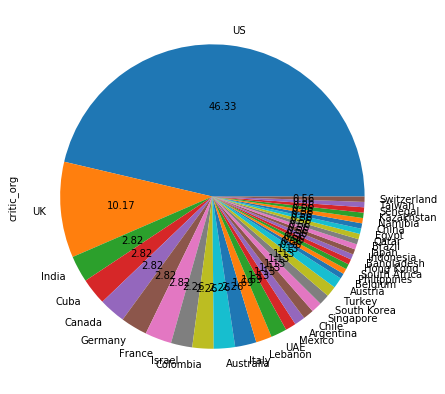

In [72]:
critics.critic_org.value_counts().plot(kind = 'pie', autopct = '%.2f', figsize=(7, 7))

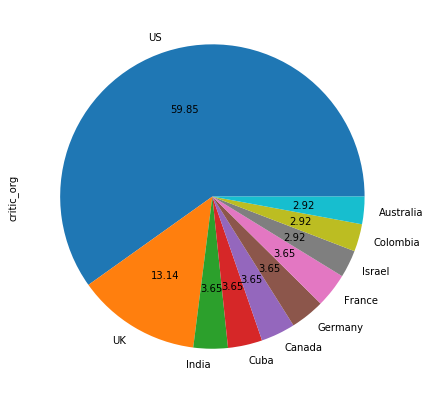

In [75]:
critics.critic_org.value_counts().head(10).plot(kind = 'pie', autopct = '%.2f', figsize=(7, 7))

### Make a movie_info table

In [10]:
movies = []
for movie in movies_info:
    movie = movie.text.split(')')
    for mv in movie:
        if mv != '':
            movies.append(mv)
df = pd.DataFrame(movies)
df.to_csv('movies.csv',index = False)

> There is one line which has a different pattern with others, 
> so I used regular expressions and replace to clean the csv file.
> The final file is movies_fixed.csv.

In [12]:
movies = pd.read_csv('movies_fixed.csv')
movies['movie_year'] = movies.movie_year.astype(str)
movies

movie_rank                             movie_name  \
0              1                       Mulholland Drive   
1              2                   In the Mood for Love   
2              3                       The Tree of Life   
3              4                 Yi Yi: A One and a Two   
4              5                    Goodbye to Language   
5              6                      The White Meadows   
6              7                Night Across the Street   
7              8                         Certified Copy   
8              9                                Sparrow   
9             10                                  Fados   
10             1                   In the Mood for Love   
11             2  Eternal Sunshine of the Spotless Mind   
12             3                Syndromes and a Century   
13             4                          Spirited Away   
14             5                     The Act of Killing   
15             6               The Grand Budapest Hotel   
16             7                          The New World   
17             8                         Certified Copy   
18             9                              The World   
19            10                               Elephant   
20             1                       Zero Dark Thirty   
21             2                  A History of Violence   
22             3               The Grand Budapest Hotel   
23             4                        Stories We Tell   
24             5                          Casino Royale   
25             6  Eternal Sunshine of the Spotless Mind   
26             7                                   Tabu   
27             8                             Snow White   
28             9                           Frozen River   
29            10                           Gosford Park   
...          ...                                    ...   
1740           1                       Mulholland Drive   
1741           2                        Kings and Queen   
1742           3                 Yi Yi: A One and a Two   
1743           4                                 Oldboy   
1744           5                             Antichrist   
1745           6                        Children of Men   
1746           7                    Lost in Translation   
1747           8                           Femme Fatale   
1748           9                          Casino Royale   
1749          10              Blue Is the Warmest Color   
1750           1                   In the Mood for Love   
1751           2                       The Tree of Life   
1752           3                              A Prophet   
1753           4                                 Amélie   
1754           5                          Spirited Away   
1755           6                     Brokeback Mountain   
1756           7                            Talk to Her   
1757           8                       Mulholland Drive   
1758           9  Eternal Sunshine of the Spotless Mind   
1759          10                                  Amour   
1760           1   Spring,Summer,Fall,Winter…and Spring   
1761           2                              The Hours   
1762           3                     The Sun Also Rises   
1763           4                           A Separation   
1764           5                           Lust,Caution   
1765           6                    The Lives of Others   
1766           7                             Still Life   
1767           8                                Birdman   
1768           9                       Infernal Affairs   
1769          10                            City of God   

                         movie_director movie_year  
0                           David Lynch       2001  
1                          Wong Kar-wai       2000  
2                       Terrence Malick       2011  
3                           Edward Yang       2000  
4                       Jean-Luc Godard       2014  
5                     Mohamma

In [13]:
BBC = pd.concat([movies, critics_repeated], axis=1, join_axes=[movies.index])

In [14]:
BBC

movie_rank                             movie_name  \
0              1                       Mulholland Drive   
1              2                   In the Mood for Love   
2              3                       The Tree of Life   
3              4                 Yi Yi: A One and a Two   
4              5                    Goodbye to Language   
5              6                      The White Meadows   
6              7                Night Across the Street   
7              8                         Certified Copy   
8              9                                Sparrow   
9             10                                  Fados   
10             1                   In the Mood for Love   
11             2  Eternal Sunshine of the Spotless Mind   
12             3                Syndromes and a Century   
13             4                          Spirited Away   
14             5                     The Act of Killing   
15             6               The Grand Budapest Hotel   
16             7                          The New World   
17             8                         Certified Copy   
18             9                              The World   
19            10                               Elephant   
20             1                       Zero Dark Thirty   
21             2                  A History of Violence   
22             3               The Grand Budapest Hotel   
23             4                        Stories We Tell   
24             5                          Casino Royale   
25             6  Eternal Sunshine of the Spotless Mind   
26             7                                   Tabu   
27             8                             Snow White   
28             9                           Frozen River   
29            10                           Gosford Park   
...          ...                                    ...   
1740           1                       Mulholland Drive   
1741           2                        Kings and Queen   
1742           3                 Yi Yi: A One and a Two   
1743           4                                 Oldboy   
1744           5                             Antichrist   
1745           6                        Children of Men   
1746           7                    Lost in Translation   
1747           8                           Femme Fatale   
1748           9                          Casino Royale   
1749          10              Blue Is the Warmest Color   
1750           1                   In the Mood for Love   
1751           2                       The Tree of Life   
1752           3                              A Prophet   
1753           4                                 Amélie   
1754           5                          Spirited Away   
1755           6                     Brokeback Mountain   
1756           7                            Talk to Her   
1757           8                       Mulholland Drive   
1758           9  Eternal Sunshine of the Spotless Mind   
1759          10                                  Amour   
1760           1   Spring,Summer,Fall,Winter…and Spring   
1761           2                              The Hours   
1762           3                     The Sun Also Rises   
1763           4                           A Separation   
1764           5                           Lust,Caution   
1765           6                    The Lives of Others   
1766           7                             Still Life   
1767           8                                Birdman   
1768           9                       Infernal Affairs   
1769          10                            City of God   

                         movie_director movie_year         critic_name  \
0                           David Lynch       2001        Simon Abrams   
1                          Wong Kar-wai       2000        Simon Abrams   
2                       Terrence Malick       2011        Simon Abrams   
3                           Edward Yang       2000 

>#### Query2: Top 10 voted movies

In [81]:
movies.movie_name.value_counts().head(10)

In the Mood for Love                     49
Mulholland Drive                         47
There Will Be Blood                      35
Spirited Away                            34
Boyhood                                  30
Eternal Sunshine of the Spotless Mind    29
A Separation                             28
The Tree of Life                         23
Yi Yi: A One and a Two                   22
No Country For Old Men                   21
Name: movie_name, dtype: int64

In [82]:
# Set a new column of the number of critics who vote for a movie.
BBC['num_of_nom'] = BBC.groupby(['movie_name'])['critic_org'].transform('count')
BBC

movie_rank                             movie_name  \
0              1                       Mulholland Drive   
1              2                   In the Mood for Love   
2              3                       The Tree of Life   
3              4                 Yi Yi: A One and a Two   
4              5                    Goodbye to Language   
5              6                      The White Meadows   
6              7                Night Across the Street   
7              8                         Certified Copy   
8              9                                Sparrow   
9             10                                  Fados   
10             1                   In the Mood for Love   
11             2  Eternal Sunshine of the Spotless Mind   
12             3                Syndromes and a Century   
13             4                          Spirited Away   
14             5                     The Act of Killing   
15             6               The Grand Budapest Hotel   
16             7                          The New World   
17             8                         Certified Copy   
18             9                              The World   
19            10                               Elephant   
20             1                       Zero Dark Thirty   
21             2                  A History of Violence   
22             3               The Grand Budapest Hotel   
23             4                        Stories We Tell   
24             5                          Casino Royale   
25             6  Eternal Sunshine of the Spotless Mind   
26             7                                   Tabu   
27             8                             Snow White   
28             9                           Frozen River   
29            10                           Gosford Park   
...          ...                                    ...   
1740           1                       Mulholland Drive   
1741           2                        Kings and Queen   
1742           3                 Yi Yi: A One and a Two   
1743           4                                 Oldboy   
1744           5                             Antichrist   
1745           6                        Children of Men   
1746           7                    Lost in Translation   
1747           8                           Femme Fatale   
1748           9                          Casino Royale   
1749          10              Blue Is the Warmest Color   
1750           1                   In the Mood for Love   
1751           2                       The Tree of Life   
1752           3                              A Prophet   
1753           4                                 Amélie   
1754           5                          Spirited Away   
1755           6                     Brokeback Mountain   
1756           7                            Talk to Her   
1757           8                       Mulholland Drive   
1758           9  Eternal Sunshine of the Spotless Mind   
1759          10                                  Amour   
1760           1   Spring,Summer,Fall,Winter…and Spring   
1761           2                              The Hours   
1762           3                     The Sun Also Rises   
1763           4                           A Separation   
1764           5                           Lust,Caution   
1765           6                    The Lives of Others   
1766           7                             Still Life   
1767           8                                Birdman   
1768           9                       Infernal Affairs   
1769          10                            City of God   

                         movie_director movie_year         critic_name  \
0                           David Lynch       2001        Simon Abrams   
1                          Wong Kar-wai       2000        Simon Abrams   
2                       Terrence Malick       2011        Simon Abrams   
3                           Edward Yang       2000 

In [83]:
movies['num_of_nom'] = movies.groupby(['movie_name'])['movie_year'].transform('count')
movies

movie_rank                             movie_name  \
0              1                       Mulholland Drive   
1              2                   In the Mood for Love   
2              3                       The Tree of Life   
3              4                 Yi Yi: A One and a Two   
4              5                    Goodbye to Language   
5              6                      The White Meadows   
6              7                Night Across the Street   
7              8                         Certified Copy   
8              9                                Sparrow   
9             10                                  Fados   
10             1                   In the Mood for Love   
11             2  Eternal Sunshine of the Spotless Mind   
12             3                Syndromes and a Century   
13             4                          Spirited Away   
14             5                     The Act of Killing   
15             6               The Grand Budapest Hotel   
16             7                          The New World   
17             8                         Certified Copy   
18             9                              The World   
19            10                               Elephant   
20             1                       Zero Dark Thirty   
21             2                  A History of Violence   
22             3               The Grand Budapest Hotel   
23             4                        Stories We Tell   
24             5                          Casino Royale   
25             6  Eternal Sunshine of the Spotless Mind   
26             7                                   Tabu   
27             8                             Snow White   
28             9                           Frozen River   
29            10                           Gosford Park   
...          ...                                    ...   
1740           1                       Mulholland Drive   
1741           2                        Kings and Queen   
1742           3                 Yi Yi: A One and a Two   
1743           4                                 Oldboy   
1744           5                             Antichrist   
1745           6                        Children of Men   
1746           7                    Lost in Translation   
1747           8                           Femme Fatale   
1748           9                          Casino Royale   
1749          10              Blue Is the Warmest Color   
1750           1                   In the Mood for Love   
1751           2                       The Tree of Life   
1752           3                              A Prophet   
1753           4                                 Amélie   
1754           5                          Spirited Away   
1755           6                     Brokeback Mountain   
1756           7                            Talk to Her   
1757           8                       Mulholland Drive   
1758           9  Eternal Sunshine of the Spotless Mind   
1759          10                                  Amour   
1760           1   Spring,Summer,Fall,Winter…and Spring   
1761           2                              The Hours   
1762           3                     The Sun Also Rises   
1763           4                           A Separation   
1764           5                           Lust,Caution   
1765           6                    The Lives of Others   
1766           7                             Still Life   
1767           8                                Birdman   
1768           9                       Infernal Affairs   
1769          10                            City of God   

                         movie_director movie_year  num_of_nom  
0                           David Lynch       2001          47  
1                          Wong Kar-wai       2000          49  
2                       Terrence Malick       2011          23  
3                           Edward Yang       2000          22  
4                     

In [88]:
movies_cleaned = movies.drop(columns = 'movie_rank')
movies_cleaned.head()

movie_name   movie_director movie_year  num_of_nom
0        Mulholland Drive      David Lynch       2001          47
1    In the Mood for Love     Wong Kar-wai       2000          49
2        The Tree of Life  Terrence Malick       2011          23
3  Yi Yi: A One and a Two      Edward Yang       2000          22
4     Goodbye to Language  Jean-Luc Godard       2014           6

In [89]:
movies_cleaned.drop_duplicates(subset='movie_name', inplace=True)
movies_cleaned = movies_cleaned.sort_values(by = 'num_of_nom', ascending = False)

In [90]:
movies_cleaned.to_csv('movies_cleaned.csv', index=False)

### Make a list of all the directors

>#### Query3: Directors' ranking by the number of their movies on the list

In [95]:
directors = movies_cleaned.groupby(by = 'movie_director')['movie_name'].nunique().reset_index(name='vote_movies')
directors.sort_values(by = 'vote_movies', ascending = False)

movie_director  vote_movies
311               Quentin Tarantino            6
276               Nuri Bilge Ceylan            5
80                   Clint Eastwood            5
384                 Tsai Ming-liang            5
164                 Jean-Luc Godard            4
242                  Michael Haneke            4
213                  Lars von Trier            4
179             Joel and Ethan Coen            4
173                     Jia Zhangke            4
204                Kenneth Lonergan            4
154                    Jafar Panahi            4
292            Paul Thomas Anderson            4
35                          Ang Lee            4
94                    David Fincher            4
39        Apichatpong Weerasethakul            4
77                Christopher Nolan            4
147                 Hou Hsiao-hsien            4
237                 Martin Scorsese            4
14      Alejandro González Iñárritu            4
397                    Wes Anderson            4
322               Richard Linklater            4
361                Steven Spielberg            4
294                 Pedro Almodóvar            3
358                   Steve McQueen            3
69                  Chantal Akerman            3
407                     Zhang Yimou            3
78                     Claire Denis            3
396                   Werner Herzog            3
92                 Darren Aronofsky            3
373                     Todd Haynes            3
..                              ...          ...
191           Josh and Benny Safdie            1
190                Josephine Decker            1
189                     Joseph Kahn            1
188                    Joseph Cedar            1
28          Andrew Lau and Alan Mak            1
186                     Jonas Mekas            1
185                      Johnnie To            1
184                   John Gianvito            1
183                    John Crowley            1
182                     John Carney            1
181           John Cameron Mitchell            1
196                    Judy Kibinge            1
197                 Julian Schnabel            1
198  Jørgen Leth and Lars von Trier            1
209                  Kinji Fukasaku            1
215                 Laurie Anderson            1
214                  Laurent Cantet            1
27                     Andrew Haigh            1
212                   Larry Charles            1
211           Kleber Mendonça Filho            1
82               Corneliu Porumboiu            1
83                    Courtney Hunt            1
199  Karim Aïnouz and Marcelo Gomes            1
207                    Kim Jee-woon            1
205                   Kevin Costner            1
1               Abdellatif Kechiche            1
203                       Ken Loach            1
202                      Ken Jacobs            1
86                   Céline Sciamma            1
227                    László Nemes            1

[409 rows x 2 columns]

In [97]:
directors_ = directors["movie_director"].tolist()
directors_

['Abbas Kiarostami',
 'Abdellatif Kechiche',
 'Abderrahmane Sissako',
 'Adam Curtis',
 'Adam McKay',
 'Agnieszka Holland',
 'Agnès Jaoui',
 'Agnès Varda',
 'Aki Kaurismäki',
 'Alain Cavalier',
 'Alain Gomis',
 'Alain Guiraudie',
 'Alain Resnais',
 'Albert Serra',
 'Alejandro González Iñárritu',
 'Aleksandr Sokurov',
 'Aleksey Fedorchenko',
 'Aleksey German',
 'Alex Garland',
 'Alexander Payne',
 'Alfonso Cuarón',
 'Amma Asante',
 'Ana Lily Amirpour',
 'Andrea Arnold',
 'Andrew Adamson and Vicky Jenson',
 'Andrew Dominik',
 'Andrew Dosunmu',
 'Andrew Haigh',
 'Andrew Lau and Alan Mak',
 'Andrew Stanton',
 'Andrew Stanton and Lee Unkrich',
 'Andrey Zvyagintsev',
 'Andrzej Wajda',
 'Andrzej Zulawski',
 'André Singer',
 'Ang Lee',
 'Annemarie Jacir',
 'Anthony and Joe Russo',
 'Anurag Kashyap',
 'Apichatpong Weerasethakul',
 'Ari Folman',
 'Arnaud Desplechin',
 'Asghar Farhadi',
 'Ashutosh Gowariker',
 'Asif Kapadia',
 'Ava DuVernay',
 'Avi Nesher',
 'Bahman Ghobadi',
 'Bart Layton',
 'Baz

In [21]:
Directors = []
for director in directors:
    try:
        splited = director.split(',')
        for sp in splited:
            try:
                dic = sp.split(' and ')
                for d in dic:
                    if d == 'Anthony':
                        d = 'Anthony Russo'
                        Directors.append(d)
                    if d == 'Joel':
                        d = 'Joel Coen'
                    else:
                        Directors.append(d)
            except:
                pass
                Directors.append(sp)
    except:
        pass

Directors = list(set(Directors))
Directors

['Sam Raimi',
 'Jacob Krupnick',
 'Nina Paley',
 'Mariano Llinás',
 'Norbert Pfaffenbichler',
 'Cristi Puiu',
 'Ang Lee',
 'Larry Charles',
 'Michael Mann',
 'Michelangelo Frammartino',
 'Carol Morley',
 'Hany Abu-Assad',
 'Shlomi Elkabetz',
 'Charlie Kaufman',
 'Joanna Hogg',
 'Lee Unkrich',
 'Marco Bellocchio',
 'Ernie Gehr',
 'Michael Winterbottom',
 'Jennifer Kent',
 'Greg Mottola',
 'Luigi M. Faccini',
 'Adam McKay',
 'Corneliu Porumboiu',
 'Jacques Rivette',
 'Andrzej Zulawski',
 'Ramin Bahrani',
 'Ben Stiller',
 'Gus Van Sant',
 'Jack Neo',
 'Tom Ford',
 'Josephine Decker',
 'Mohamed Soueid',
 'Abderrahmane Sissako',
 'Judy Kibinge',
 'Stephen Frears',
 'Trey Parker',
 'Park Chan-wook',
 'Patty Jenkins',
 'Pablo Larraín',
 'Ashutosh Gowariker',
 'Sarah Polley',
 'Olivier Assayas',
 'Apichatpong Weerasethakul',
 'Mira Nair',
 'J. A. Bayona',
 'Sion Sono',
 'Anthony Russo',
 'Jason Silverman',
 'Marcelo Gomes',
 'Lucrecia Martel',
 'Alfonso Cuarón',
 'Nanni Moretti',
 'Eran Koliri

### Match movie names with their imdb titleIds

In [23]:
title = pd.read_csv('title.akas.tsv', sep = '\t')

/Users/dongyinan1/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
title_imdb = title.drop(columns = ['types', 'attributes', 'isOriginalTitle']).\
    rename(columns = {'title':'movie_name'})

In [33]:
imdb_t = pd.merge(movies_cleaned, title_imdb, how='inner', on = 'movie_name')
imdb_t = imdb_t.drop_duplicates(subset = 'movie_name', keep = 'first').reset_index().drop(columns = ['ordering','region','language','index'])

In [34]:
imdb_t.head()

movie_name     movie_director movie_year  num_of_nom    titleId
0      Mulholland Drive        David Lynch       2001          47  tt0166924
1  In the Mood for Love       Wong Kar-wai       2000          49  tt0118694
2      The Tree of Life    Terrence Malick       2011          23  tt0137243
3   Goodbye to Language    Jean-Luc Godard       2014           6  tt2400275
4     The White Meadows  Mohammad Rasoulof       2009           1  tt1509132

In [37]:
imdb_t.to_csv('imdb_t.csv', index = False)
imdb_t

movie_name             movie_director  \
0                         Mulholland Drive                David Lynch   
1                     In the Mood for Love               Wong Kar-wai   
2                         The Tree of Life            Terrence Malick   
3                      Goodbye to Language            Jean-Luc Godard   
4                        The White Meadows          Mohammad Rasoulof   
5                  Night Across the Street                 Raoul Ruiz   
6                           Certified Copy           Abbas Kiarostami   
7                                  Sparrow                 Johnnie To   
8                                    Fados               Carlos Saura   
9    Eternal Sunshine of the Spotless Mind              Michel Gondry   
10                 Syndromes and a Century  Apichatpong Weerasethakul   
11                           Spirited Away             Hayao Miyazaki   
12                      The Act of Killing         Joshua Oppenheimer   
13                The Grand Budapest Hotel               Wes Anderson   
14                           The New World            Terrence Malick   
15                               The World                Jia Zhangke   
16                                Elephant               Gus Van Sant   
17                        Zero Dark Thirty            Kathryn Bigelow   
18                   A History of Violence           David Cronenberg   
19                           Casino Royale            Martin Campbell   
20                                    Tabu               Miguel Gomes   
21                              Snow White               Pablo Berger   
22                            Frozen River              Courtney Hunt   
23                            Gosford Park              Robert Altman   
24                               Inception          Christopher Nolan   
25                         Pan's Labyrinth         Guillermo Del Toro   
26                                   Caché             Michael Haneke   
27                             Grizzly Man              Werner Herzog   
28                             Holy Motors                 Leos Carax   
29                  The Last of the Unjust            Claude Lanzmann   
..                                     ...                        ...   
510                       Samson & Delilah           Warwick Thornton   
511                          Secret Things       Jean-Claude Brisseau   
512                             La Ciénaga            Lucrecia Martel   
513                          In the Family               Patrick Wang   
514                                  Gerry               Gus Van Sant   
515            Songs from the Second Floor              Roy Andersson   
516                    Journey to the West            Tsai Ming-liang   
517             The 3 Rooms of Melancholia            Pirjo Honkasalo   
518                                  Japon            Carlos Reygadas   
519                     Neighboring Sounds      Kleber Mendonça Filho   
520                               Time Out             Laurent Cantet   
521                           Burning Bush          Agnieszka Holland   
522                                Barbara          Christian Petzold   
523                  A Tale of Two Sisters               Kim Jee-woon   
524                          Meek's Cutoff            Kelly Reichardt   
525                          Love Actually             Richard Curtis   
526                                Chicago               Rob Marshall   
527                          High Fidelity             Stephen Frears   
528                             Four Lions         Christopher Morris   
529                     Gangs of Wasseypur             Anurag Kashyap   
530                        This Is England              Shane Meadows   
531                     The Skin I Live In            Pedro Almodóvar   
532                                   Once                John Carney   
533              

In [46]:
imdb_t = pd.read_csv('imdb_t_fixed.csv',index_col = 0)
imdb_t

movie_name             movie_director  \
0                         Mulholland Drive                David Lynch   
1                     In the Mood for Love               Wong Kar-wai   
2                         The Tree of Life            Terrence Malick   
3                      Goodbye to Language            Jean-Luc Godard   
4                        The White Meadows          Mohammad Rasoulof   
5                  Night Across the Street                 Raoul Ruiz   
6                           Certified Copy           Abbas Kiarostami   
7                                  Sparrow                 Johnnie To   
8                                    Fados               Carlos Saura   
9    Eternal Sunshine of the Spotless Mind              Michel Gondry   
10                 Syndromes and a Century  Apichatpong Weerasethakul   
11                           Spirited Away             Hayao Miyazaki   
12                      The Act of Killing         Joshua Oppenheimer   
13                The Grand Budapest Hotel               Wes Anderson   
14                           The New World            Terrence Malick   
15                               The World                Jia Zhangke   
16                                Elephant               Gus Van Sant   
17                        Zero Dark Thirty            Kathryn Bigelow   
18                   A History of Violence           David Cronenberg   
19                           Casino Royale            Martin Campbell   
20                                    Tabu               Miguel Gomes   
21                              Snow White               Pablo Berger   
22                            Frozen River              Courtney Hunt   
23                            Gosford Park              Robert Altman   
24                               Inception          Christopher Nolan   
25                         Pan's Labyrinth         Guillermo Del Toro   
26                                   Caché             Michael Haneke   
27                             Grizzly Man              Werner Herzog   
28                             Holy Motors                 Leos Carax   
29                  The Last of the Unjust            Claude Lanzmann   
..                                     ...                        ...   
510                       Samson & Delilah           Warwick Thornton   
511                          Secret Things       Jean-Claude Brisseau   
512                             La Ciénaga            Lucrecia Martel   
513                          In the Family               Patrick Wang   
514                                  Gerry               Gus Van Sant   
515            Songs from the Second Floor              Roy Andersson   
516                    Journey to the West            Tsai Ming-liang   
517             The 3 Rooms of Melancholia            Pirjo Honkasalo   
518                                  Japon            Carlos Reygadas   
519                     Neighboring Sounds      Kleber Mendonça Filho   
520                               Time Out             Laurent Cantet   
521                           Burning Bush          Agnieszka Holland   
522                                Barbara          Christian Petzold   
523                  A Tale of Two Sisters               Kim Jee-woon   
524                          Meek's Cutoff            Kelly Reichardt   
525                          Love Actually             Richard Curtis   
526                                Chicago               Rob Marshall   
527                          High Fidelity             Stephen Frears   
528                             Four Lions         Christopher Morris   
529                     Gangs of Wasseypur             Anurag Kashyap   
530                        This Is England              Shane Meadows   
531                     The Skin I Live In            Pedro Almodóvar   
532                                   Once                John Carney   
533              

In [47]:
def scrape_page(row):
    url = f"https://www.imdb.com/title/{row['titleId']}"
    print("Scraping", url)
    
    dlinks = {}
    
    response = requests.get(url)
    doc = BeautifulSoup(response.text)
    print('Now Scraping', url)
    
    dlinks['titleId'] = row['titleId']
    
    try:
        dlinks['mv_fullname'] = doc.find('h1').text
    except:
        pass
    
    try:
        dlinks['movie_name'] = doc.find('h1').next_element
    except:
        pass
    
    try:
        dlinks['dlink'] = doc.find('h4').parent.a['href']
    except:
        pass
    
    try:
        dlinks['director'] = doc.find('h4').parent.a.text
    except:
        pass

    try:
        dlinks['imdb_rating'] = doc.find(itemprop="ratingValue").text
    except:
        pass

    try:
        dlinks['imdb_rate_num'] = doc.find(itemprop="ratingCount").text
    except:
        pass
    
    try:
        dlinks['Metascore'] = doc.find(class_="metacriticScore score_favorable titleReviewBarSubItem").text.strip()
    except:
        pass
    
    return pd.Series(dlinks)

In [48]:
imdb_T = imdb_t.apply(scrape_page,axis = 1)

Scraping https://www.imdb.com/title/tt0166924
Now Scraping https://www.imdb.com/title/tt0166924
Scraping https://www.imdb.com/title/tt0166924
Now Scraping https://www.imdb.com/title/tt0166924
Scraping https://www.imdb.com/title/tt0118694
Now Scraping https://www.imdb.com/title/tt0118694
Scraping https://www.imdb.com/title/tt0478304
Now Scraping https://www.imdb.com/title/tt0478304
Scraping https://www.imdb.com/title/tt2400275
Now Scraping https://www.imdb.com/title/tt2400275
Scraping https://www.imdb.com/title/tt1509132
Now Scraping https://www.imdb.com/title/tt1509132
Scraping https://www.imdb.com/title/tt1876360
Now Scraping https://www.imdb.com/title/tt1876360
Scraping https://www.imdb.com/title/tt1020773
Now Scraping https://www.imdb.com/title/tt1020773
Scraping https://www.imdb.com/title/tt0491044
Now Scraping https://www.imdb.com/title/tt0491044
Scraping https://www.imdb.com/title/tt1056422
Now Scraping https://www.imdb.com/title/tt1056422
Scraping https://www.imdb.com/title/tt03

Now Scraping https://www.imdb.com/title/tt3409392
Scraping https://www.imdb.com/title/tt1020072
Now Scraping https://www.imdb.com/title/tt1020072
Scraping https://www.imdb.com/title/tt1149362
Now Scraping https://www.imdb.com/title/tt1149362
Scraping https://www.imdb.com/title/tt1221141
Now Scraping https://www.imdb.com/title/tt1221141
Scraping https://www.imdb.com/title/tt0265666
Now Scraping https://www.imdb.com/title/tt0265666
Scraping https://www.imdb.com/title/tt1748122
Now Scraping https://www.imdb.com/title/tt1748122
Scraping https://www.imdb.com/title/tt0335266
Now Scraping https://www.imdb.com/title/tt0335266
Scraping https://www.imdb.com/title/tt1315981
Now Scraping https://www.imdb.com/title/tt1315981
Scraping https://www.imdb.com/title/tt0435761
Now Scraping https://www.imdb.com/title/tt0435761
Scraping https://www.imdb.com/title/tt1226236
Now Scraping https://www.imdb.com/title/tt1226236
Scraping https://www.imdb.com/title/tt0246578
Now Scraping https://www.imdb.com/title/

Now Scraping https://www.imdb.com/title/tt0363226
Scraping https://www.imdb.com/title/tt0168629
Now Scraping https://www.imdb.com/title/tt0168629
Scraping https://www.imdb.com/title/tt2178935
Now Scraping https://www.imdb.com/title/tt2178935
Scraping https://www.imdb.com/title/tt0313670
Now Scraping https://www.imdb.com/title/tt0313670
Scraping https://www.imdb.com/title/tt0923688
Now Scraping https://www.imdb.com/title/tt0923688
Scraping https://www.imdb.com/title/tt0181875
Now Scraping https://www.imdb.com/title/tt0181875
Scraping https://www.imdb.com/title/tt0353969
Now Scraping https://www.imdb.com/title/tt0353969
Scraping https://www.imdb.com/title/tt0381668
Now Scraping https://www.imdb.com/title/tt0381668
Scraping https://www.imdb.com/title/tt2328813
Now Scraping https://www.imdb.com/title/tt2328813
Scraping https://www.imdb.com/title/tt0443453
Now Scraping https://www.imdb.com/title/tt0443453
Scraping https://www.imdb.com/title/tt1139797
Now Scraping https://www.imdb.com/title/

Now Scraping https://www.imdb.com/title/tt2582802
Scraping https://www.imdb.com/title/tt1313092
Now Scraping https://www.imdb.com/title/tt1313092
Scraping https://www.imdb.com/title/tt0472043
Now Scraping https://www.imdb.com/title/tt0472043
Scraping https://www.imdb.com/title/tt1233381
Now Scraping https://www.imdb.com/title/tt1233381
Scraping https://www.imdb.com/title/tt4145178
Now Scraping https://www.imdb.com/title/tt4145178
Scraping https://www.imdb.com/title/tt0415306
Now Scraping https://www.imdb.com/title/tt0415306
Scraping https://www.imdb.com/title/tt0985597
Now Scraping https://www.imdb.com/title/tt0985597
Scraping https://www.imdb.com/title/tt0475276
Now Scraping https://www.imdb.com/title/tt0475276
Scraping https://www.imdb.com/title/tt1478338
Now Scraping https://www.imdb.com/title/tt1478338
Scraping https://www.imdb.com/title/tt3521134
Now Scraping https://www.imdb.com/title/tt3521134
Scraping https://www.imdb.com/title/tt0272338
Now Scraping https://www.imdb.com/title/

Now Scraping https://www.imdb.com/title/tt0300270
Scraping https://www.imdb.com/title/tt0245574
Now Scraping https://www.imdb.com/title/tt0245574
Scraping https://www.imdb.com/title/tt0970179
Now Scraping https://www.imdb.com/title/tt0970179
Scraping https://www.imdb.com/title/tt0180073
Now Scraping https://www.imdb.com/title/tt0180073
Scraping https://www.imdb.com/title/tt1673697
Now Scraping https://www.imdb.com/title/tt1673697
Scraping https://www.imdb.com/title/tt1772424
Now Scraping https://www.imdb.com/title/tt1772424
Scraping https://www.imdb.com/title/tt1077262
Now Scraping https://www.imdb.com/title/tt1077262
Scraping https://www.imdb.com/title/tt0211915
Now Scraping https://www.imdb.com/title/tt0211915
Scraping https://www.imdb.com/title/tt0499549
Now Scraping https://www.imdb.com/title/tt0499549
Scraping https://www.imdb.com/title/tt3125472
Now Scraping https://www.imdb.com/title/tt3125472
Scraping https://www.imdb.com/title/tt1125849
Now Scraping https://www.imdb.com/title/

Now Scraping https://www.imdb.com/title/tt1065628
Scraping https://www.imdb.com/title/tt1182350
Now Scraping https://www.imdb.com/title/tt1182350
Scraping https://www.imdb.com/title/tt3460252
Now Scraping https://www.imdb.com/title/tt3460252
Scraping https://www.imdb.com/title/tt0248845
Now Scraping https://www.imdb.com/title/tt0248845
Scraping https://www.imdb.com/title/tt0266308
Now Scraping https://www.imdb.com/title/tt0266308
Scraping https://www.imdb.com/title/tt1095217
Now Scraping https://www.imdb.com/title/tt1095217
Scraping https://www.imdb.com/title/tt3455822
Now Scraping https://www.imdb.com/title/tt3455822
Scraping https://www.imdb.com/title/tt3464902
Now Scraping https://www.imdb.com/title/tt3464902
Scraping https://www.imdb.com/title/tt0218839
Now Scraping https://www.imdb.com/title/tt0218839
Scraping https://www.imdb.com/title/tt1360860
Now Scraping https://www.imdb.com/title/tt1360860
Scraping https://www.imdb.com/title/tt0301357
Now Scraping https://www.imdb.com/title/

Now Scraping https://www.imdb.com/title/tt0302674
Scraping https://www.imdb.com/title/tt0120263
Now Scraping https://www.imdb.com/title/tt0120263
Scraping https://www.imdb.com/title/tt3521442
Now Scraping https://www.imdb.com/title/tt3521442
Scraping https://www.imdb.com/title/tt0424272
Now Scraping https://www.imdb.com/title/tt0424272
Scraping https://www.imdb.com/title/tt0322824
Now Scraping https://www.imdb.com/title/tt0322824
Scraping https://www.imdb.com/title/tt2190367
Now Scraping https://www.imdb.com/title/tt2190367
Scraping https://www.imdb.com/title/tt0279065
Now Scraping https://www.imdb.com/title/tt0279065
Scraping https://www.imdb.com/title/tt2280344
Now Scraping https://www.imdb.com/title/tt2280344
Scraping https://www.imdb.com/title/tt2178941
Now Scraping https://www.imdb.com/title/tt2178941
Scraping https://www.imdb.com/title/tt0365376
Now Scraping https://www.imdb.com/title/tt0365376
Scraping https://www.imdb.com/title/tt1518812
Now Scraping https://www.imdb.com/title/

In [49]:
imdb_T.to_csv('imdbT.csv', index = False)

In [50]:
imdb_T

Metascore                   director             dlink imdb_rate_num  \
0          83                David Lynch  /name/nm0000186/       291,785   
1          85               Kar-Wai Wong  /name/nm0939182/       106,308   
2          85            Terrence Malick  /name/nm0000517/       156,582   
3          75            Jean-Luc Godard  /name/nm0000419/         4,918   
4         NaN          Mohammad Rasoulof  /name/nm1488024/           458   
5          76                 Raoul Ruiz  /name/nm0749914/           409   
6          82           Abbas Kiarostami  /name/nm0452102/        18,296   
7         NaN                 Johnnie To  /name/nm0864775/         2,556   
8          70               Carlos Saura  /name/nm0767022/           705   
9          89              Michel Gondry  /name/nm0327273/       828,533   
10         71  Apichatpong Weerasethakul  /name/nm0917405/         3,377   
11         96             Hayao Miyazaki  /name/nm0594503/       561,576   
12         90         Joshua Oppenheimer  /name/nm1484791/        31,224   
13         88               Wes Anderson  /name/nm0027572/       636,092   
14         69            Terrence Malick  /name/nm0000517/        78,753   
15         81                Zhangke Jia  /name/nm0422605/         2,742   
16         70               Gus Van Sant  /name/nm0001814/        80,713   
17         95            Kathryn Bigelow  /name/nm0000941/       251,832   
18         81           David Cronenberg  /name/nm0000343/       211,236   
19         80            Martin Campbell  /name/nm0132709/       540,713   
20         78               Miguel Gomes  /name/nm0326937/         6,030   
21         82               Pablo Berger  /name/nm0074311/         9,767   
22         82              Courtney Hunt  /name/nm2581581/        23,588   
23         90              Robert Altman  /name/nm0000265/        73,906   
24         74          Christopher Nolan  /name/nm0634240/     1,848,653   
25         98         Guillermo del Toro  /name/nm0868219/       574,029   
26         83             Michael Haneke  /name/nm0359734/        66,500   
27         87              Werner Herzog  /name/nm0001348/        48,431   
28         84                 Leos Carax  /name/nm0136021/        37,006   
29         80            Claude Lanzmann  /name/nm0487351/           579   
..        ...                        ...               ...           ...   
510        75           Warwick Thornton  /name/nm0861610/         3,037   
511       NaN       Jean-Claude Brisseau  /name/nm0109885/         4,283   
512        75            Lucrecia Martel  /name/nm0551506/         4,696   
513        82               Patrick Wang  /name/nm1169526/           650   
514       NaN               Gus Van Sant  /name/nm0001814/        16,810   
515        76              Roy Andersson  /name/nm0027815/        15,769   
516       NaN            Ming-liang Tsai  /name/nm0158857/           658   
517        67            Pirjo Honkasalo  /name/nm0393345/           601   
518        76            Carlos Reygadas  /name/nm1196161/         2,943   
519        77      Kleber Mendonça Filho  /name/nm2207625/         5,694   
520        88             Laurent Cantet  /name/nm0134559/         4,481   
521        83          Tatiana Pauhofová  /name/nm1294207/         1,188   
522        86          Christian Petzold  /name/nm0678857/        11,338   
523        65               Jee-woon Kim  /name/nm0453518/        50,914   
524        85            Kelly Reichardt  /name/nm0716980/        10,475   
525       NaN             Richard Curtis  /name/nm0193485/       386,892   
526        82               Rob Marshall  /name/nm0551128/       201,603   
527        79             Stephen Frears  /name/nm0001241/       158,765   
528        68         Christopher Morris  /name/nm0606439/        66,366   
529        89             Anurag Kashyap  /name/nm0440604/        69,406   
530        86              Shane Meadows  /name/nm02